# Efecto del rozamiento con el aire 
## 8 de Marzo del 2023
Brenda P. Gutierrez



Se definen las constantes de la simulacion:

In [1]:
dt = 0.01 #Paso de la simulacion en segundos
tmax = 50 #Tiempo de la simulacion en segundos
m = 75 #Masa del sistema bicicleta-ciclista en kg
v0 = 4 #Rapidez inicial del sistema en m/s
P = 400 #Potencia que aporta el ciclista en Watts/s
C = 1 #Factor de forma
Dens = 1.2933 #Densidad de aire en kg/m^3
A = 1 #Area transversal del sistema en m^2
nIteraciones = int(tmax/dt)  # número de iteraciones

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,tmax,dt)
v = v0 #rapidez en el tiempo t=0 sin friccion
vaire = v0  #rapidez en el tiempo t=0 con friccion
V = [v0] #vector que almacena los resultados de velocidad
Vaire = [v0] #vector que almacena los datos con friccion

for k in range(len(t)-1):
    v = v+P/(m*v)*dt
    vaire = vaire+P/(m*vaire)*dt-((1/2)*C*Dens*A*vaire**2*dt)/m
    V.append(v)
    Vaire.append(vaire)


In [3]:
t = np.linspace(0,tmax,nIteraciones)
vRK4 = v0
vRK4aire = v0
VRK4 = []
VRK4aire = []

#Para no hacerme bolas, un ciclo para cada caso:

#caso en el vacio con RK4
for k in range(nIteraciones):
    v1 = vRK4+(P/m*vRK4)*dt/2
    v2 = vRK4+(P/m*v1)*dt/2
    v3 = vRK4+(P/m*v2)*dt
    
    k1 = P/(m*vRK4)
    k2 = P/(m*v1)
    k3 = P/(m*v2)
    k4 = P/(m*v3)
    
    vRK4 = vRK4+1/6*(k1+2*k2+2*k3+k4)*dt
    VRK4.append(vRK4)

#caso con friccion con RK4
for k in range(nIteraciones):
    v1aire = vRK4aire+((P/m*vRK4aire)-((1/2)*C*Dens*A*vRK4aire**2)/m)*dt/2
    v2aire = vRK4aire+((P/m*v1aire)-((1/2)*C*Dens*A*v1aire**2)/m)*dt/2
    v3aire = vRK4aire+((P/m*v2aire)-((1/2)*C*Dens*A*v2aire**2)/m)*dt
    
    k1aire = P/(m*vRK4aire)-((1/2)*C*Dens*A*vRK4aire**2)/m
    k2aire = P/(m*v1aire)-((1/2)*C*Dens*A*v1aire**2)/m
    k3aire = P/(m*v2aire)-((1/2)*C*Dens*A*v2aire**2)/m
    k4aire = P/(m*v3aire)-((1/2)*C*Dens*A*v3aire**2)/m
    
    vRK4aire = vRK4aire+(1/6)*(k1aire+2*k2aire+2*k3aire+k4aire)*dt
    VRK4aire.append(vRK4aire)
    

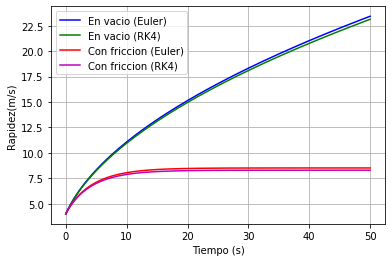

In [4]:
#graficamos todos los resultados  
plt.plot(t,V, '-b', label = "En vacio (Euler)")
plt.plot(t,VRK4,'-g',label = 'En vacio (RK4)')
plt.plot(t,Vaire, '-r', label = "Con friccion (Euler)")
plt.plot(t,VRK4aire, '-m',label = 'Con friccion (RK4)')
plt.xlabel("Tiempo (s)")
plt.ylabel("Rapidez(m/s)")
plt.legend()
plt.grid()


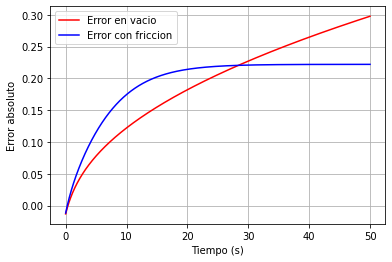

In [5]:
#Grafica de errores
Error = []
Erroraire = []
for i in range(len(V)):
    Error.append(V[i]-VRK4[i])
    Erroraire.append(Vaire[i]-VRK4aire[i])

plt.plot(t,Error, '-r',label = 'Error en vacio')
plt.plot(t,Erroraire,'-b', label ='Error con friccion')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Error absoluto')
plt.grid()
